### Package Python

In [1]:
# Packages Manipulation
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import xarray as xr
import os as os

# Packages Graph
%matplotlib inline
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Packages ML
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Metrics of errors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Reading of bases

In [2]:
_current_path = os.getcwd()
_current_path

'c:\\git\\Gol_Cases'

In [3]:
_path1 = os.path.join(_current_path, 'data', 'Case Analytics-DS.xlsx')
_path1
_df = pd.read_excel(io=_path1, sheet_name='Dados')
_df.head(2)

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197


In [4]:
_path2 = os.path.join(_current_path, 'data', 'cotacao_dolar.csv')
_df_cot = pd.read_csv(_path2, sep=';',  encoding='latin1')
_df_cot.columns = _df_cot.columns.str.lower()
_df_cot.columns = _df_cot.columns.str.replace(' ', '_')
_df_cot = _df_cot[['data', 'último']].rename(columns={'último':'usd_rate'})
_df_cot['data'] = pd.to_datetime(_df_cot['data'])
_df_cot['data'] = _df_cot['data'].dt.strftime('%Y-%m-%d')
_df_cot = _df_cot.sort_values(['data', 'usd_rate']).reset_index(drop=True)
_df_cot['data'] = pd.to_datetime(_df_cot['data'])
_df_cot['usd_rate'] = _df_cot['usd_rate'].str.replace(',','.').astype(float)
_df_cot.head(5)


,data,usd_rate
0,2016-01-11,3.2367
1,2016-01-12,3.4718
2,2016-02-11,3.2359
3,2016-02-12,3.4755
4,2016-03-11,3.2425


In [5]:
_df_cot.dtypes

data        datetime64[ns]
usd_rate           float64
dtype: object

In [6]:
_df

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039
...,...,...,...,...,...,...
2427,2017-04-01,Porta a Porta,Vast,1079,28486.396741,54551
2428,2017-04-01,Porta a Porta,Ellipsis,841,23600.998318,46988
2429,2017-04-01,TeleVenda,Arena,175,10270.292519,26599
2430,2017-04-01,Telégrafo,Arena,105,5470.410450,15130


In [7]:
# Merge data

_df = _df.merge(_df_cot, left_on='Data Venda', right_on='data', how='left')
_df = _df.drop('data', axis=1)
_df['usd_rate'] = _df['usd_rate'].fillna(_df['usd_rate'].mean())
_df

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK,usd_rate
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,3.217581
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.217581
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.217581
...,...,...,...,...,...,...,...
2427,2017-04-01,Porta a Porta,Vast,1079,28486.396741,54551,3.216300
2428,2017-04-01,Porta a Porta,Ellipsis,841,23600.998318,46988,3.216300
2429,2017-04-01,TeleVenda,Arena,175,10270.292519,26599,3.216300
2430,2017-04-01,Telégrafo,Arena,105,5470.410450,15130,3.216300


In [8]:
_df.columns = _df.columns.str.lower()
_df.columns

Index(['data venda', 'canal de venda', 'local de venda', 'pax',
       'monetário vendido', 'rpk', 'usd_rate'],
      dtype='object')

In [9]:
_df.columns = _df.columns.str.replace(' ', '_')
_df.columns

Index(['data_venda', 'canal_de_venda', 'local_de_venda', 'pax',
       'monetário_vendido', 'rpk', 'usd_rate'],
      dtype='object')

In [10]:
_df.describe()

,pax,monetário_vendido,rpk,usd_rate
count,2432.000000,2432.000000,2432.000000,2432.000000
mean,723.002878,24638.740498,66738.389391,3.217581
std,735.936451,22424.842904,83479.039478,0.085241
min,18.000000,1041.544400,1127.000000,3.057500
25%,100.000000,6122.920492,11372.000000,3.168875
50%,395.500000,17755.421730,33361.500000,3.217581
75%,1160.250000,35535.323991,95116.750000,3.217581
max,4705.000000,144890.731053,695824.000000,3.440400


In [11]:
_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2432 entries, 0 to 2431
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data_venda         2432 non-null   datetime64[ns]
 1   canal_de_venda     2432 non-null   object        
 2   local_de_venda     2432 non-null   object        
 3   pax                2432 non-null   int64         
 4   monetário_vendido  2432 non-null   float64       
 5   rpk                2432 non-null   int64         
 6   usd_rate           2432 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 152.0+ KB


In [12]:
_df.dtypes

data_venda           datetime64[ns]
canal_de_venda               object
local_de_venda               object
pax                           int64
monetário_vendido           float64
rpk                           int64
usd_rate                    float64
dtype: object

* Checking values nan or nulls

In [13]:
_df.isna().sum()

data_venda           0
canal_de_venda       0
local_de_venda       0
pax                  0
monetário_vendido    0
rpk                  0
usd_rate             0
dtype: int64

In [14]:
_df.isnull().sum()

data_venda           0
canal_de_venda       0
local_de_venda       0
pax                  0
monetário_vendido    0
rpk                  0
usd_rate             0
dtype: int64

In [15]:
_df.shape

(2432, 7)

* PAX é o total de passageiros. 
* RPK (Revenue Passenger‐Kilometers) é um indicador diretamente relacionada com o número de PAX.  $ {RPK} = {PAX } * {KM} $

In [16]:
_df = _df.dropna()
_df.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,3.217581
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.217581
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.217581


In [17]:
_df['km'] = _df['rpk'] / _df['pax']
_df

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581,115.866667
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581,157.634615
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,3.217581,127.631579
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.217581,107.415323
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.217581,44.326087
...,...,...,...,...,...,...,...,...
2427,2017-04-01,Porta a Porta,Vast,1079,28486.396741,54551,3.216300,50.556997
2428,2017-04-01,Porta a Porta,Ellipsis,841,23600.998318,46988,3.216300,55.871581
2429,2017-04-01,TeleVenda,Arena,175,10270.292519,26599,3.216300,151.994286
2430,2017-04-01,Telégrafo,Arena,105,5470.410450,15130,3.216300,144.095238


* Adding km

In [18]:
def plotar(titulo: str, labelx: str, labely: str, x: str, y: str, dataset: dict, fontt: int, fontlx: int, fontly: int) -> dict: 
    """Função para plotagem de gráfico"""
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=fontt)
    ax.set_xlabel(labelx, fontsize=fontlx)
    ax.set_ylabel(labely, fontsize=fontly)
    ax = ax
    return ax

In [19]:
def plot_comparacao(x, y1,y2,y3, y4=None, params=False, dataset=None, titulo=None):
    plt.figure(figsize=(16,12))
    if params:
        ax = plt.subplot(4,1,1)
        ax.set_title(titulo, fontsize=18, loc='left')
        sns.lineplot(x = x, y = y1, data = dataset) 
        ax = plt.subplot(4,1,2)
        sns.lineplot(x = x, y = y2, data = dataset) 
        ax = plt.subplot(4,1,3)
        sns.lineplot(x = x, y = y3, data = dataset) 
        ax = plt.subplot(4,1,4)
        sns.lineplot(x = x, y = y4, data = dataset)     
    else:
        ax = plt.subplot(3,1,1)
        ax.set_title(titulo, fontsize=18, loc='left')
        sns.lineplot(x = x, y = y1, data = dataset) 
        ax = plt.subplot(3,1,2)
        sns.lineplot(x = x, y = y2, data = dataset) 
        ax = plt.subplot(3,1,3)
        sns.lineplot(x = x, y = y3, data = dataset)  
    ax = ax
    return ax

In [20]:
_df['aceleracao_pax'] = _df['pax'].diff()
_df['aumento_pax'] = _df['aceleracao_pax'].diff()
_df['aceleracao_rpk'] = _df['rpk'].diff()
_df['aumento_rpk'] = _df['aceleracao_rpk'].diff()
_df['aceleracao_km'] = _df['km'].diff()
_df['aumento_km'] = _df['aceleracao_km'].diff()
_df = _df.fillna(0)
_df

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,3.217581,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.217581,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.217581,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,2017-04-01,Porta a Porta,Vast,1079,28486.396741,54551,3.216300,50.556997,-707.0,-2426.0,-212781.0,-472112.0,-99.124974,-129.389034
2428,2017-04-01,Porta a Porta,Ellipsis,841,23600.998318,46988,3.216300,55.871581,-238.0,469.0,-7563.0,205218.0,5.314584,104.439558
2429,2017-04-01,TeleVenda,Arena,175,10270.292519,26599,3.216300,151.994286,-666.0,-428.0,-20389.0,-12826.0,96.122704,90.808120
2430,2017-04-01,Telégrafo,Arena,105,5470.410450,15130,3.216300,144.095238,-70.0,596.0,-11469.0,8920.0,-7.899048,-104.021752


<AxesSubplot:xlabel='data_venda', ylabel='aceleracao_pax'>

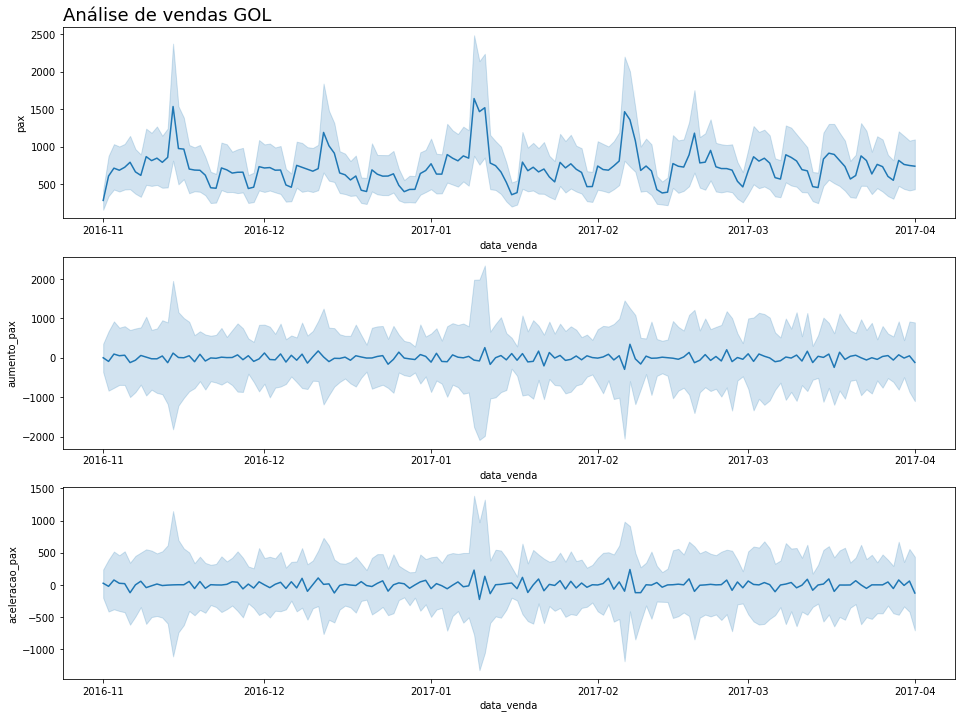

In [21]:
plot_comparacao(x='data_venda', y1='pax', y2='aumento_pax', y3='aceleracao_pax', dataset=_df, titulo='Análise de vendas GOL')

<AxesSubplot:xlabel='data_venda', ylabel='aceleracao_rpk'>

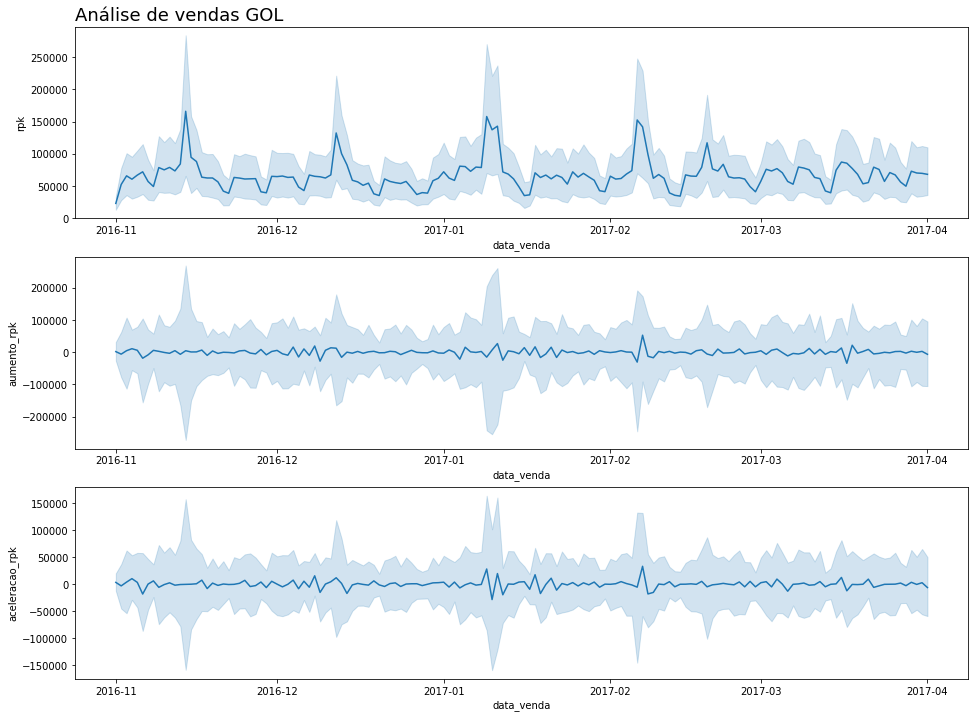

In [22]:
plot_comparacao(x='data_venda', y1='rpk', y2='aumento_rpk', y3='aceleracao_rpk', dataset=_df, titulo='Análise de vendas GOL')

<AxesSubplot:xlabel='data_venda', ylabel='aceleracao_km'>

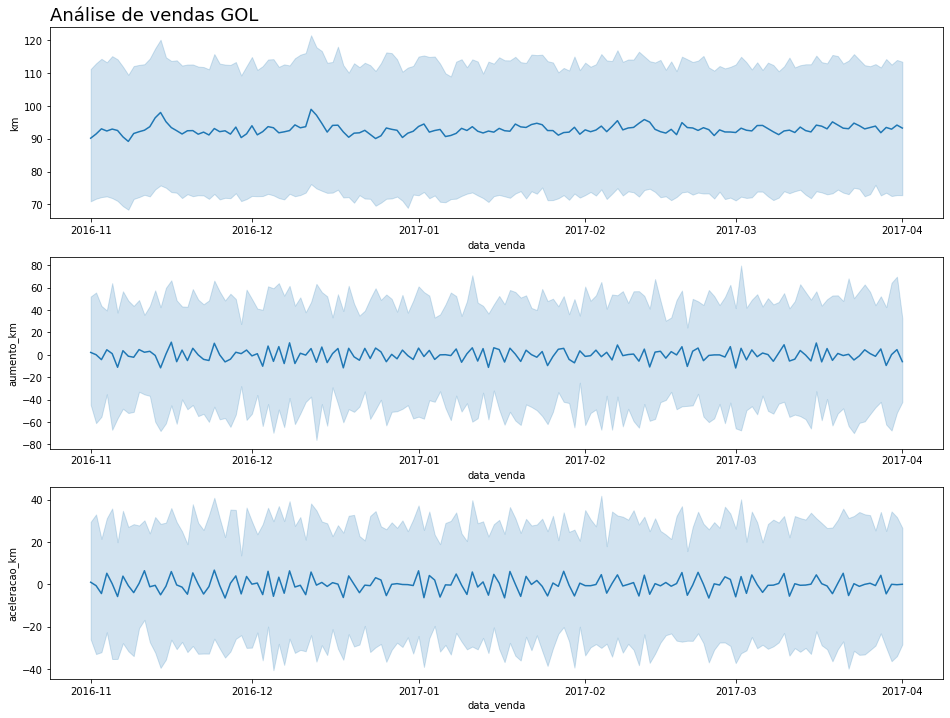

In [23]:
plot_comparacao(x='data_venda', y1='km', y2='aumento_km', y3='aceleracao_km', dataset=_df, titulo='Análise de vendas GOL')

1. Faça um ranking para o número total de PAX por dia da semana.

In [24]:
_ranking = _df.groupby(['data_venda'])['pax'].sum().reset_index()
_ranking = _ranking.sort_values('pax').reset_index(drop=True)
_ranking['ranking'] = _ranking.index
_ranking

,data_venda,pax,ranking
0,2016-11-01,4538,0
1,2017-01-16,5751,1
2,2017-02-13,6127,2
3,2017-01-17,6197,3
4,2017-02-14,6298,4
...,...,...,...
147,2017-02-06,23444,147
148,2017-01-10,23460,148
149,2017-01-11,24298,149
150,2016-11-14,24551,150


* Shoing the 5 first and lasts PAX of Ranking.

In [25]:
_ranking.head(5)

,data_venda,pax,ranking
0,2016-11-01,4538,0
1,2017-01-16,5751,1
2,2017-02-13,6127,2
3,2017-01-17,6197,3
4,2017-02-14,6298,4


In [26]:
_ranking.tail(5)

,data_venda,pax,ranking
147,2017-02-06,23444,147
148,2017-01-10,23460,148
149,2017-01-11,24298,149
150,2016-11-14,24551,150
151,2017-01-09,26247,151


* Sum of total of pax

In [27]:
_df['pax'].sum()

1758343

In [28]:
_ranking['pax'].sum()

1758343

In [29]:
_df['rpk'].sum()

162307763

2. Qual a correlação de sábado e domingo somados com o total de RPK?

In [30]:
from datetime import date

def find_day(year,  month, day):

    DIAS = [
        'Segunda-feira',
        'Terça-feira',
        'Quarta-feira',
        'Quinta-feira',
        'Sexta-feira',
        'Sábado',
        'Domingo'
    ]

    data = date(year=year,  month=month, day=day)
    # print(data)

    indice_da_semana = data.weekday()
    # print(indice_da_semana)

    dia_da_semana = DIAS[indice_da_semana]
    # print(dia_da_semana)
    return dia_da_semana

In [31]:
_df['data_venda_str'] = _df['data_venda'].astype(str)
_df.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-11-01
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000,2016-11-01
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,3.217581,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985,2016-11-01
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.217581,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780,2016-11-01
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.217581,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979,2016-11-01


In [32]:
_df['data_venda_str'].str.split('-', expand=True)

,0,1,2
0,2016,11,01
1,2016,11,01
2,2016,11,01
3,2016,11,01
4,2016,11,01
...,...,...,...
2427,2017,04,01
2428,2017,04,01
2429,2017,04,01
2430,2017,04,01


In [33]:
_df['year'] = _df['data_venda_str'].str.split('-', expand=True)[0]
_df['month'] = _df['data_venda_str'].str.split('-', expand=True)[1]
_df['day'] = _df['data_venda_str'].str.split('-', expand=True)[2]

In [34]:
_df.head()

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-11-01,2016,11,01
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000,2016-11-01,2016,11,01
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,3.217581,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985,2016-11-01,2016,11,01
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.217581,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780,2016-11-01,2016,11,01
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.217581,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979,2016-11-01,2016,11,01


In [35]:
_df['dias_da_semana'] = _df.apply( lambda x: find_day(int(x['year']), int(x['month']), int(x['day'])), axis=1 )


In [36]:
_df.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-11-01,2016,11,01,Terça-feira
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000,2016-11-01,2016,11,01,Terça-feira
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,3.217581,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985,2016-11-01,2016,11,01,Terça-feira
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.217581,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780,2016-11-01,2016,11,01,Terça-feira
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.217581,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979,2016-11-01,2016,11,01,Terça-feira


In [37]:
_df2 = _df[['data_venda', 'dias_da_semana', 'rpk']]
_df2 = _df2.groupby(['data_venda']).sum().reset_index()
_df2.head(5)

,data_venda,rpk
0,2016-11-01,367479
1,2016-11-02,837263
2,2016-11-03,1051716
3,2016-11-04,968225
4,2016-11-05,1069765


In [38]:
_df2['data_venda'].min()

Timestamp('2016-11-01 00:00:00')

In [39]:
_df2['data_venda'].max()

Timestamp('2017-04-01 00:00:00')

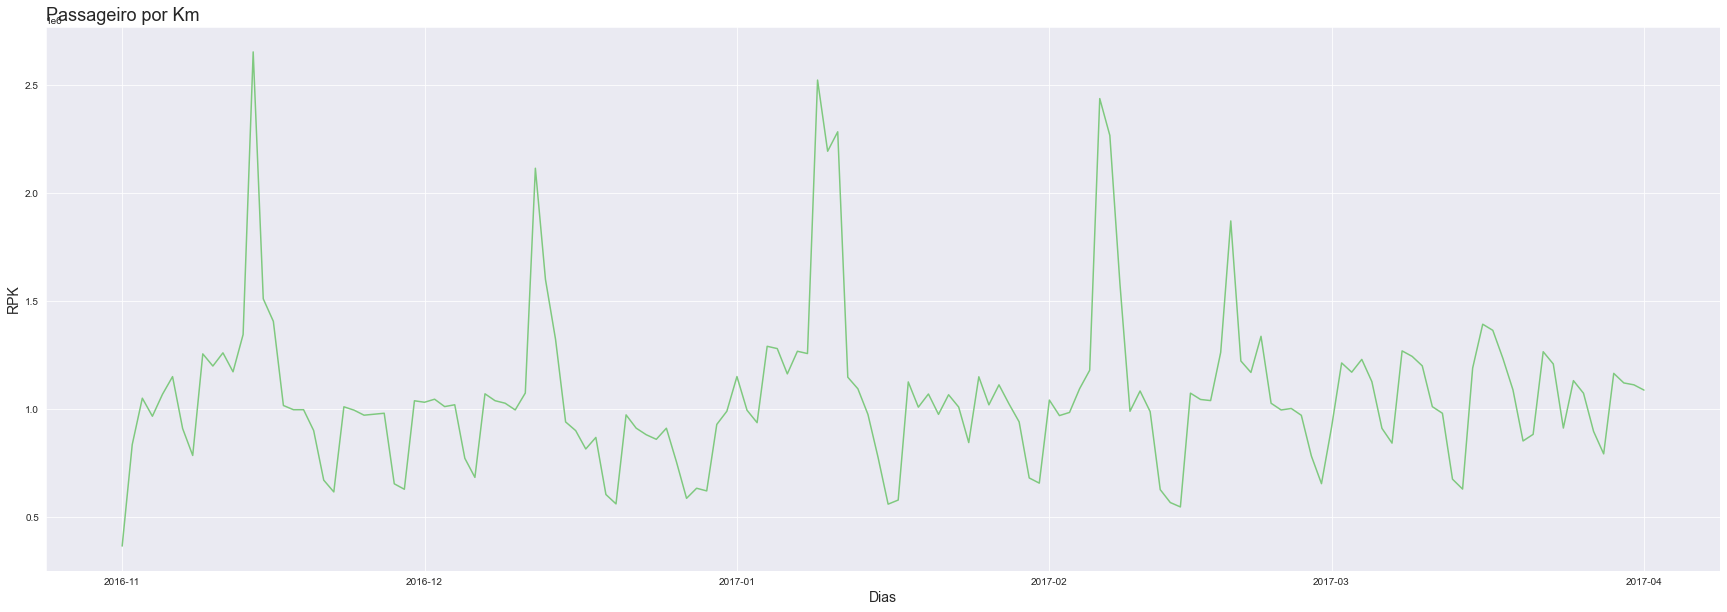

In [40]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'data_venda', y = 'rpk', data = _df2)
ax.figure.set_size_inches(30, 10)
# ax.set(xticks=_df2.data_venda.values)
ax.set_title('Passageiro por Km', loc='left', fontsize=18)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('RPK', fontsize=14)
ax = ax

In [41]:
_df2['rpk'].max()

2653733

In [42]:
_df2[_df2['rpk'] > 2000000]
_df2['data_venda_str'] = _df2['data_venda'].astype(str)
_df2['year'] = _df2['data_venda_str'].str.split('-', expand=True)[0]
_df2['month'] = _df2['data_venda_str'].str.split('-', expand=True)[1]
_df2['day'] = _df2['data_venda_str'].str.split('-', expand=True)[2]
_df2['dias_da_semana'] = _df2.apply( lambda x: find_day(int(x['year']), int(x['month']), int(x['day'])), axis=1 ) 
_df2.drop(columns=['data_venda_str','year','month','day'], inplace=True)
_df2.groupby(['dias_da_semana'])['rpk'].sum().sort_values()

dias_da_semana
Terça-feira      20366840
Domingo          22388695
Sábado           23201577
Segunda-feira    23275908
Sexta-feira      23309936
Quinta-feira     23501102
Quarta-feira     26263705
Name: rpk, dtype: int64

In [43]:
_df4 = _df[['data_venda', 'dias_da_semana', 'rpk']]
_df4['order'] = _df4['dias_da_semana'].map({'Segunda-feira':1, 'Terça-feira':2, 'Quarta-feira':3, 'Quinta-feira':4, 'Sexta-feira':5, 'Sábado':6, 'Domingo':7})
_df4 = _df4.groupby(['dias_da_semana']).sum().reset_index()
_df4['order'] = _df4['dias_da_semana'].map({'Segunda-feira':1, 'Terça-feira':2, 'Quarta-feira':3, 'Quinta-feira':4, 'Sexta-feira':5, 'Sábado':6, 'Domingo':7})
_df4 = _df4.sort_values(['order'])
_df4 = _df4.drop(columns='order')
_df4

C:\Users\conta\AppData\Local\Temp/ipykernel_14176/3433924337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df4['order'] = _df4['dias_da_semana'].map({'Segunda-feira':1, 'Terça-feira':2, 'Quarta-feira':3, 'Quinta-feira':4, 'Sexta-feira':5, 'Sábado':6, 'Domingo':7})


,dias_da_semana,rpk
3,Segunda-feira,23275908
6,Terça-feira,20366840
1,Quarta-feira,26263705
2,Quinta-feira,23501102
4,Sexta-feira,23309936
5,Sábado,23201577
0,Domingo,22388695


Text(0, 0.5, 'RPK')

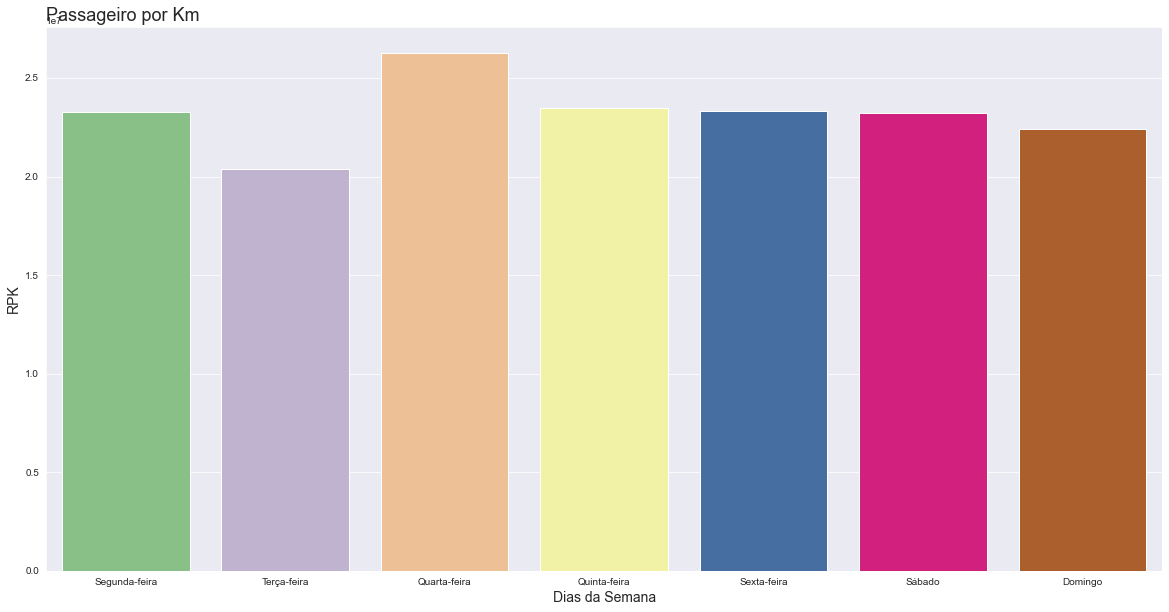

In [44]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(x = 'dias_da_semana', y = 'rpk', data = _df4)
ax.figure.set_size_inches(20, 10)
ax.set_title('Passageiro por Km', loc='left', fontsize=18)
ax.set_xlabel('Dias da Semana', fontsize=14)
ax.set_ylabel('RPK', fontsize=14)
# for i in ax.containers:
#     ax.bar_label(i)


In [45]:
_data_prk_sab_dom = _df[(_df['dias_da_semana']=='Sábado') | (_df['dias_da_semana']=='Domingo')]
_data_prk_sab_dom.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana
64,2016-11-05,TeleVenda,Mindscape,1378,60813.490656,164710,3.217581,119.528302,-307.0,-1191.0,-72156.0,-264109.0,-21.044992,-105.547125,2016-11-05,2016,11,05,Sábado
65,2016-11-05,Telégrafo,Ellipsis,42,2695.438460,2399,3.217581,57.119048,-1336.0,-1029.0,-162311.0,-90155.0,-62.409254,-41.364262,2016-11-05,2016,11,05,Sábado
66,2016-11-05,TeleVenda,Arena,206,15726.530904,32153,3.217581,156.082524,164.0,1500.0,29754.0,192065.0,98.963477,161.372731,2016-11-05,2016,11,05,Sábado
67,2016-11-05,Porta a Porta,Vast,1314,30005.759983,61962,3.217581,47.155251,1108.0,944.0,29809.0,55.0,-108.927273,-207.890750,2016-11-05,2016,11,05,Sábado
68,2016-11-05,Porta a Porta,Mindscape,877,34594.723120,98153,3.217581,111.919042,-437.0,-1545.0,36191.0,6382.0,64.763791,173.691064,2016-11-05,2016,11,05,Sábado


In [46]:
_quantidade_de_dias_fds = _data_prk_sab_dom.groupby(['data_venda','dias_da_semana'])['dias_da_semana'].count()
_quantidade_de_dias_fds.head(5)

data_venda  dias_da_semana
2016-11-05  Sábado            16
2016-11-06  Domingo           16
2016-11-12  Sábado            16
2016-11-13  Domingo           16
2016-11-19  Sábado            16
Name: dias_da_semana, dtype: int64

In [47]:
_data_prk_sab_dom.shape

(688, 19)

In [48]:
_data_prk_sab_dom['rpk'].describe()

count       688.000000
mean      66264.930233
std       77345.549978
min        1671.000000
25%       12829.750000
50%       31592.500000
75%       95087.500000
max      474353.000000
Name: rpk, dtype: float64

In [49]:
_df3 = _data_prk_sab_dom.copy()
_df3 = _df3[['data_venda', 'dias_da_semana', 'rpk']]
_df3.head(5)

,data_venda,dias_da_semana,rpk
64,2016-11-05,Sábado,164710
65,2016-11-05,Sábado,2399
66,2016-11-05,Sábado,32153
67,2016-11-05,Sábado,61962
68,2016-11-05,Sábado,98153


In [50]:
_df3 = _df3.groupby(['data_venda']).sum()
_df3.head(5)

,rpk
data_venda,
2016-11-05,1069765
2016-11-06,1151471
2016-11-12,1173772
2016-11-13,1346138
2016-11-19,998433


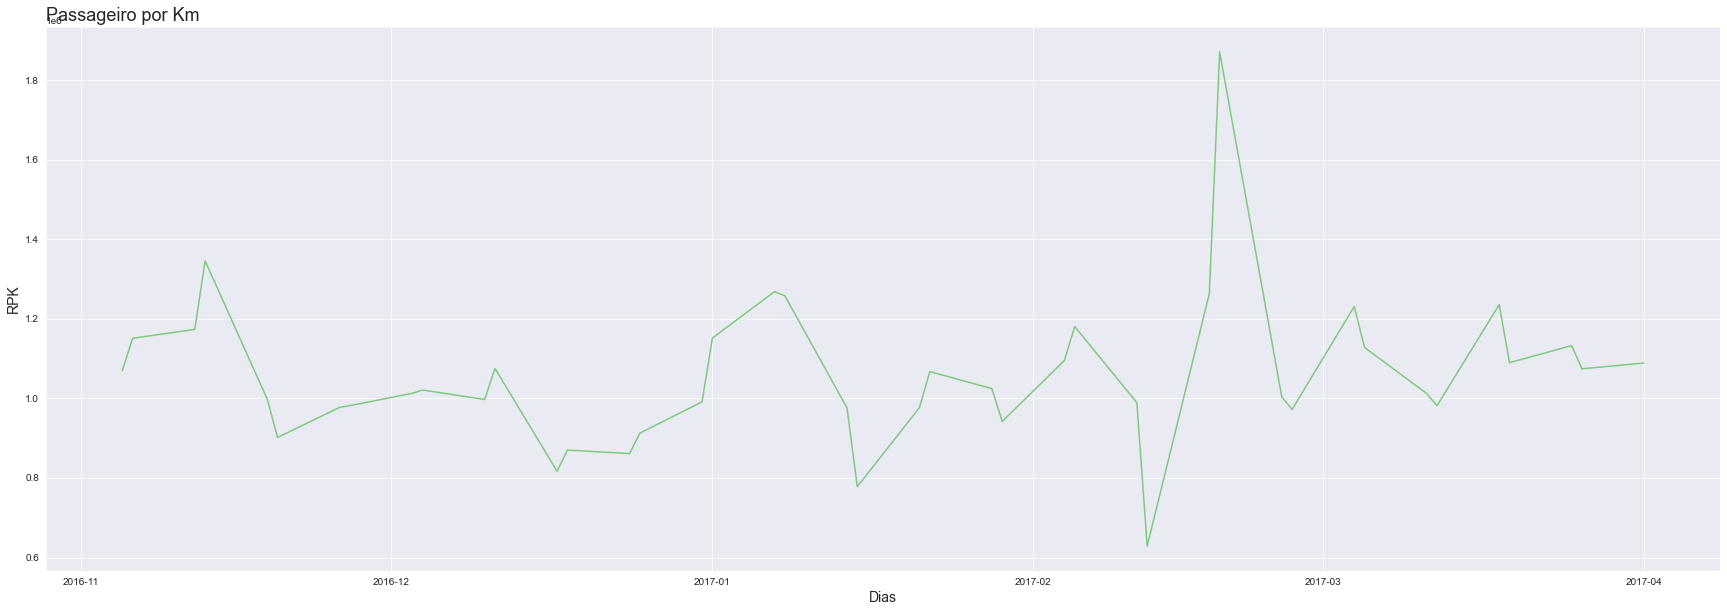

In [51]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'data_venda', y = 'rpk', data = _df3)
ax.figure.set_size_inches(30, 10)
ax.set_title('Passageiro por Km', loc='left', fontsize=18)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('RPK', fontsize=14)
ax = ax

In [52]:
total_rpk = _df2['rpk'].sum()
total_rpk

162307763

In [53]:
_data_prk_sab_dom = _data_prk_sab_dom['rpk'].sum()
_data_prk_sab_dom

45590272

In [54]:
_representativeness = round( ( ( _data_prk_sab_dom / total_rpk) ) * 100, 2)
print(f"O RPK de Sábado e Domingo representam {_representativeness}% de um total de {total_rpk:,.2f} do RPK de todos os períodos ")


O RPK de Sábado e Domingo representam 28.09% de um total de 162,307,763.00 do RPK de todos os períodos 


In [55]:
_df.head(2)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581,115.866667,0.0,0.0,0.0,0.0,0.000000,0.0,2016-11-01,2016,11,01,Terça-feira
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.0,2016-11-01,2016,11,01,Terça-feira


In [56]:
vendas_rpk_agrupadas = _df.groupby('dias_da_semana')['rpk','aumento_rpk','aceleracao_rpk'].mean().round()
vendas_rpk_agrupadas

C:\Users\conta\AppData\Local\Temp/ipykernel_14176/626739433.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_rpk_agrupadas = _df.groupby('dias_da_semana')['rpk','aumento_rpk','aceleracao_rpk'].mean().round()


,rpk,aumento_rpk,aceleracao_rpk
dias_da_semana,,,
Domingo,66633.0,-1533.0,-640.0
Quarta-feira,74613.0,-460.0,-590.0
Quinta-feira,66764.0,-651.0,-453.0
Segunda-feira,69274.0,-1358.0,811.0
Sexta-feira,66221.0,-1123.0,-397.0
Sábado,65914.0,2365.0,840.0
Terça-feira,57860.0,2581.0,437.0


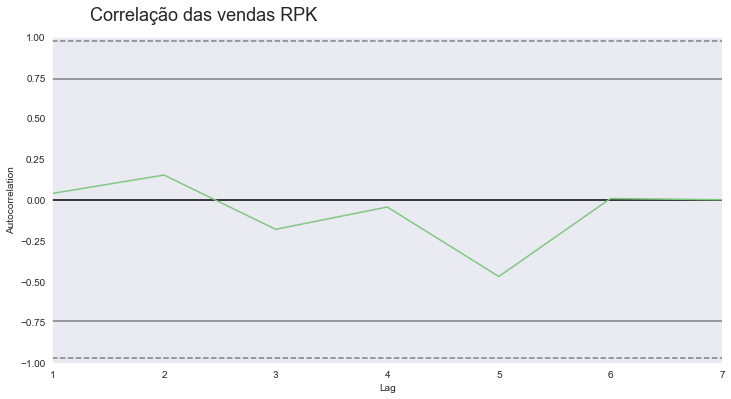

In [57]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas RPK', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_rpk_agrupadas['rpk'])
ax = ax

3. Qual a média de ‘Monetário’ por mês por Canal? E a mediana?

In [58]:
_df_sum_channels = _df.groupby(['data_venda', 'canal_de_venda'])['monetário_vendido'].sum().reset_index()
_df_sum_channels = _df_sum_channels.sort_values(['monetário_vendido']).reset_index(drop=True).rename(columns={'monetário_vendido':'soma_monetário_vendido'})
_df_sum_channels

,data_venda,canal_de_venda,soma_monetário_vendido
0,2017-02-14,Telégrafo,7500.944465
1,2017-03-07,Telégrafo,9887.166630
2,2016-11-01,Telégrafo,10158.006555
3,2016-12-29,Telégrafo,10405.957828
4,2017-01-31,Telégrafo,10664.869419
...,...,...,...
451,2017-02-08,TeleVenda,349715.586496
452,2017-02-05,TeleVenda,358595.468696
453,2017-01-18,TeleVenda,365814.443628
454,2017-02-18,TeleVenda,374294.488479


In [59]:
_df_mean_channels = _df.groupby(['data_venda', 'canal_de_venda'])['monetário_vendido'].mean().reset_index()
_df_mean_channels = _df_mean_channels.sort_values(['monetário_vendido']).reset_index(drop=True).rename(columns={'monetário_vendido':'media_monetário_vendido'})
_df_mean_channels

,data_venda,canal_de_venda,media_monetário_vendido
0,2017-02-14,Telégrafo,1875.236116
1,2017-03-07,Telégrafo,2471.791657
2,2016-11-01,Telégrafo,2539.501639
3,2016-12-29,Telégrafo,2601.489457
4,2017-01-31,Telégrafo,2666.217355
...,...,...,...
451,2017-02-07,Porta a Porta,57817.974229
452,2016-12-12,Porta a Porta,60264.692703
453,2016-11-15,Porta a Porta,61025.684473
454,2017-02-06,Porta a Porta,62582.661791


In [60]:
_df_median_channels = _df.groupby(['data_venda', 'canal_de_venda'])['monetário_vendido'].median().reset_index()
_df_median_channels = _df_median_channels.sort_values('monetário_vendido').reset_index(drop=True).rename(columns={'monetário_vendido':'mediana_monetário_vendido'})
_df_median_channels

,data_venda,canal_de_venda,mediana_monetário_vendido
0,2017-02-14,Telégrafo,1855.066440
1,2016-11-29,Telégrafo,1927.050453
2,2017-01-24,Telégrafo,1952.403237
3,2017-03-07,Telégrafo,2131.861597
4,2016-11-22,Telégrafo,2291.569788
...,...,...,...
451,2017-01-10,Porta a Porta,54620.850069
452,2017-02-07,Porta a Porta,54622.131114
453,2017-02-06,Porta a Porta,54958.440086
454,2016-11-15,Porta a Porta,56412.237777


In [61]:
_mediana  = _df_median_channels['mediana_monetário_vendido'].median()
_mediana

23402.420995328324

4. Crie um forecast de PAX por ‘Local de Venda’ para os próximos 15 dias a contar da última data de venda. (Aqui a técnica é livre) 


##### Fazendo média móvel de 7 e 21 dias de PAX.

In [62]:
_df.head()

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-11-01,2016,11,01,Terça-feira
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000,2016-11-01,2016,11,01,Terça-feira
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,3.217581,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985,2016-11-01,2016,11,01,Terça-feira
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.217581,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780,2016-11-01,2016,11,01,Terça-feira
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.217581,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979,2016-11-01,2016,11,01,Terça-feira


In [63]:
_df['media_movel_7'] = _df['pax'].rolling(7).mean().fillna(0)
_df['media_movel_21'] = _df['pax'].rolling(21).mean().fillna(0)

In [64]:
_df.head(30)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km,aceleracao_pax,aumento_pax,...,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana,media_movel_7,media_movel_21
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581,115.866667,0.0,0.0,...,0.0,0.000000,0.000000,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581,157.634615,22.0,0.0,...,0.0,41.767949,0.000000,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,3.217581,127.631579,-33.0,-55.0,...,-10493.0,-30.003036,-71.770985,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.217581,107.415323,477.0,510.0,...,56625.0,-20.216256,9.786780,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.217581,44.326087,-450.0,-927.0,...,-102092.0,-63.089236,-42.872979,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
5,2016-11-01,TeleVenda,Arena,485,19002.649824,66096,3.217581,136.280412,439.0,889.0,...,115296.0,91.954325,155.043561,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
6,2016-11-01,TeleVenda,Vast,701,11588.271344,30866,3.217581,44.031384,216.0,-223.0,...,-99287.0,-92.249029,-184.203354,2016-11-01,2016,11,01,Terça-feira,261.285714,0.000000
7,2016-11-01,Telégrafo,Arena,39,3538.393295,5471,3.217581,140.282051,-662.0,-878.0,...,9835.0,96.250668,188.499696,2016-11-01,2016,11,01,Terça-feira,262.571429,0.000000
8,2016-11-01,TeleVenda,Ellipsis,44,2277.585505,2788,3.217581,63.363636,5.0,667.0,...,22712.0,-76.918415,-173.169082,2016-11-01,2016,11,01,Terça-feira,261.428571,0.000000
9,2016-11-01,Porta a Porta,Vast,910,14451.803370,40112,3.217581,44.079121,866.0,861.0,...,40007.0,-19.284515,57.633899,2016-11-01,2016,11,01,Terça-feira,388.714286,0.000000


<AxesSubplot:xlabel='data_venda', ylabel='media_movel_21'>

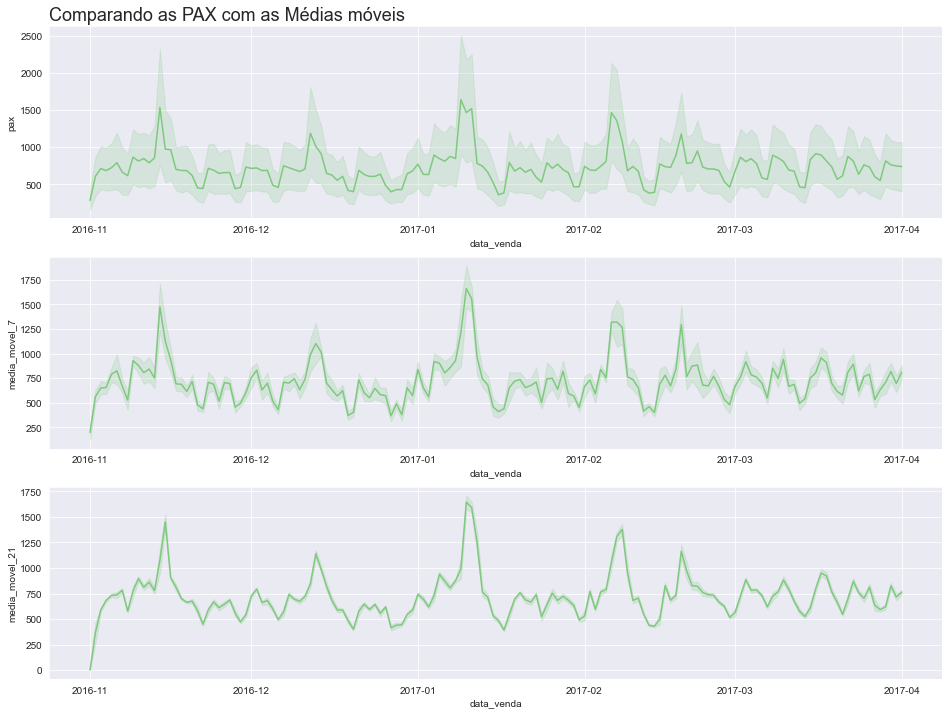

In [65]:
titulo = 'Comparando as PAX com as Médias móveis'
plot_comparacao(dataset=_df, x='data_venda', y1='pax', y2='media_movel_7', y3='media_movel_21', titulo=titulo )

In [66]:
_df['data_venda'].max()

Timestamp('2017-04-01 00:00:00')

In [67]:
_time_forecast = pd.Series(pd.date_range("2017-04-02", freq="D", periods=15))
_time_forecast

0    2017-04-02
1    2017-04-03
2    2017-04-04
3    2017-04-05
4    2017-04-06
5    2017-04-07
6    2017-04-08
7    2017-04-09
8    2017-04-10
9    2017-04-11
10   2017-04-12
11   2017-04-13
12   2017-04-14
13   2017-04-15
14   2017-04-16
dtype: datetime64[ns]

In [68]:
_forecast_moving_average = _df

In [69]:
_last_row = _forecast_moving_average.index[-1]
_last_row

2431

In [70]:
index_row = list(range(_last_row,(_last_row+16)))

In [71]:
values_rows = pd.Series(pd.date_range("2017-04-02", freq="D", periods=15)).to_list()

In [72]:

for i, j in zip(index_row, values_rows):
    _forecast_moving_average.loc[i] = j
    # print(i, j)

In [73]:
_forecast_moving_average.iloc[2431:2446, 1:] = 0

In [74]:
_forecast_moving_average = _forecast_moving_average[['data_venda','local_de_venda', 'pax']]
_forecast_moving_average 


,data_venda,local_de_venda,pax
0,2016-11-01,Mindscape,30
1,2016-11-01,Arena,52
2,2016-11-01,Mindscape,19
3,2016-11-01,Mindscape,496
4,2016-11-01,Vast,46
...,...,...,...
2441,2017-04-12,0,0
2442,2017-04-13,0,0
2443,2017-04-14,0,0
2444,2017-04-15,0,0


In [75]:
_forecast_moving_average = _forecast_moving_average.groupby(['data_venda','local_de_venda'])['pax'].sum()
_forecast_moving_average = _forecast_moving_average.reset_index().drop(columns='local_de_venda')


In [76]:
_forecast_moving_average

,data_venda,pax
0,2016-11-01,1013
1,2016-11-01,851
2,2016-11-01,970
3,2016-11-01,1704
4,2016-11-02,2568
...,...,...
618,2017-04-12,0
619,2017-04-13,0
620,2017-04-14,0
621,2017-04-15,0


In [77]:
_forecast_moving_average['media_movel_7'] = _forecast_moving_average['pax'].rolling(7).mean().fillna(0)
_forecast_moving_average['media_movel_21'] = _forecast_moving_average['pax'].rolling(21).mean().fillna(0)

In [78]:
_forecast_moving_average

,data_venda,pax,media_movel_7,media_movel_21
0,2016-11-01,1013,0.0,0.000000
1,2016-11-01,851,0.0,0.000000
2,2016-11-01,970,0.0,0.000000
3,2016-11-01,1704,0.0,0.000000
4,2016-11-02,2568,0.0,0.000000
...,...,...,...,...
618,2017-04-12,0,0.0,1434.380952
619,2017-04-13,0,0.0,1305.619048
620,2017-04-14,0,0.0,1131.047619
621,2017-04-15,0,0.0,976.285714


<AxesSubplot:xlabel='data_venda', ylabel='media_movel_21'>

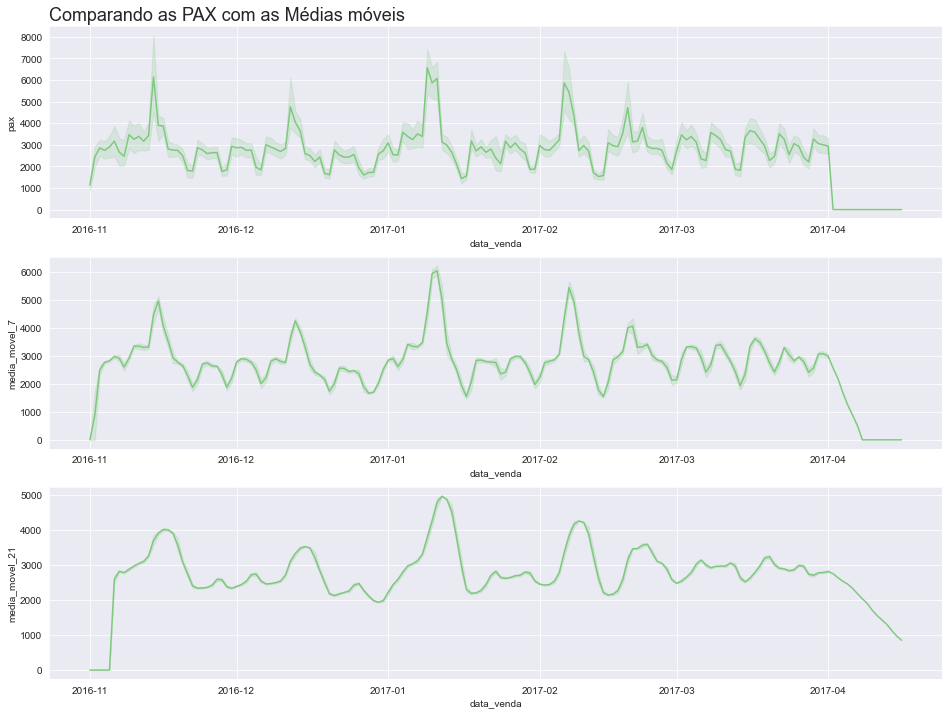

In [79]:
titulo = 'Comparando as PAX com as Médias móveis'
plot_comparacao(dataset=_forecast_moving_average, x='data_venda', y1='pax', y2='media_movel_7', y3='media_movel_21', titulo=titulo )

##### Criando Primeira Regressão Linear

In [171]:
_forecast = _df.drop('usd_rate', axis=1)
_forecast.head(2)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana,media_movel_7,media_movel_21
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-01,2016,11,01,Terça-feira,0.0,0.0
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.0,2016-11-01,2016,11,01,Terça-feira,0.0,0.0


In [172]:
convert_dict = {
                'data_venda':str, 'canal_de_venda':str, 'local_de_venda':str, 'pax':float,
                'monetário_vendido':float, 'rpk':float, 'km':float, 'aceleracao_pax':float, 'aumento_pax':float,
                'aceleracao_rpk':float, 'aumento_rpk':float, 'aceleracao_km':float, 'aumento_km':float,
                'dias_da_semana':str,'media_movel_7':float, 'media_movel_21':float
               }
  
_forecast = _forecast.astype(convert_dict)

In [173]:
_forecast.dtypes

data_venda            object
canal_de_venda        object
local_de_venda        object
pax                  float64
monetário_vendido    float64
rpk                  float64
km                   float64
aceleracao_pax       float64
aumento_pax          float64
aceleracao_rpk       float64
aumento_rpk          float64
aceleracao_km        float64
aumento_km           float64
data_venda_str        object
year                  object
month                 object
day                   object
dias_da_semana        object
media_movel_7        float64
media_movel_21       float64
dtype: object

In [174]:
_forecast.columns

Index(['data_venda', 'canal_de_venda', 'local_de_venda', 'pax',
       'monetário_vendido', 'rpk', 'km', 'aceleracao_pax', 'aumento_pax',
       'aceleracao_rpk', 'aumento_rpk', 'aceleracao_km', 'aumento_km',
       'data_venda_str', 'year', 'month', 'day', 'dias_da_semana',
       'media_movel_7', 'media_movel_21'],
      dtype='object')

In [175]:
_forecast = _forecast.groupby(['data_venda', 'monetário_vendido', 'rpk', 'km', 'local_de_venda'])['pax'].sum()
_forecast = _forecast.reset_index()
_forecast['data_venda'] = _forecast['data_venda'].astype(str)
_forecast.head(2)

,data_venda,monetário_vendido,rpk,km,local_de_venda,pax
0,2016-11-01,1041.544400,2425.0,127.631579,Mindscape,19.0
1,2016-11-01,1187.121138,1127.0,62.611111,Ellipsis,18.0


In [176]:
_forecast.shape

(2446, 6)

In [177]:
_forecast.columns

Index(['data_venda', 'monetário_vendido', 'rpk', 'km', 'local_de_venda',
       'pax'],
      dtype='object')

In [178]:
x = _forecast.drop(columns=['pax'])
y = _forecast['pax']

In [179]:
_forecast.dtypes

data_venda            object
monetário_vendido    float64
rpk                  float64
km                   float64
local_de_venda        object
pax                  float64
dtype: object

In [181]:
x = _forecast.drop(columns=['pax','data_venda','local_de_venda'])
y = _forecast['pax']

In [182]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.3, random_state=0)
modelo = DecisionTreeRegressor(random_state=24)
modelo.fit(x_train, y_train)
prediction = modelo.predict(x_val)
print(f"Predictions  {prediction[:5]}")
print(f"Target       {y[:5].values}")
print(f"Error        {y[:5].values - prediction[:5]}")
print(f"MAE        {abs(y[:5].values - prediction[:5])}")

Predictions  [217. 946. 307. 883. 996.]
Target       [19. 18. 30. 44. 46.]
Error        [-198. -928. -277. -839. -950.]
MAE        [198. 928. 277. 839. 950.]


In [184]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.3, random_state=0)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

# Normalizando os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

modelo = LinearRegression(fit_intercept=False , normalize=False)
modelo.fit(x_train_scaled, y_train)
prediction = modelo.predict(x_val_scaled)
mse = np.sqrt(mean_squared_error(y_val, p))
cof = modelo.coef_

print(f"Predictions  {prediction[:5]}")
print(f"Predictions len  {len(prediction)}")
print(f"Coeficient  {cof}")
print(f"Target       {y[:5].values}")
print(f"Error        {y[:5].values - prediction[:5]}")
print(f"MAE        {abs(y[:5].values - prediction[:5])}")

(1712, 3) (734, 3) (1712,) (734,)
Predictions  [-257.77465596  -67.78791574 -107.49159548  -24.4453353   125.42009658]
Predictions len  734
Coeficient  [ 423.41991872  321.73685437 -184.63260834]
Target       [19. 18. 30. 44. 46.]
Error        [276.77465596  85.78791574 137.49159548  68.4453353  -79.42009658]
MAE        [276.77465596  85.78791574 137.49159548  68.4453353   79.42009658]


C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


5. Supondo que você precisa gerar um estudo para a área responsável, com base em qualquer modelo ou premissa, qual ‘Local de Venda’ você considera mais crítico. Por quê?


In [207]:
_df.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km,aceleracao_pax,aumento_pax,...,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana,media_movel_7,media_movel_21
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581,115.866667,0.0,0.0,...,0.0,0.0,0.0,2016-11-01,2016,11,01,Terça-feira,0.0,0.0
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581,157.634615,22.0,0.0,...,0.0,41.767949,0.0,2016-11-01,2016,11,01,Terça-feira,0.0,0.0
2,2016-11-01,TeleVenda,Mindscape,19,1041.5444,2425,3.217581,127.631579,-33.0,-55.0,...,-10493.0,-30.003036,-71.770985,2016-11-01,2016,11,01,Terça-feira,0.0,0.0
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.217581,107.415323,477.0,510.0,...,56625.0,-20.216256,9.78678,2016-11-01,2016,11,01,Terça-feira,0.0,0.0
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.217581,44.326087,-450.0,-927.0,...,-102092.0,-63.089236,-42.872979,2016-11-01,2016,11,01,Terça-feira,0.0,0.0


In [230]:
_analise_pv = _df[['data_venda', 'local_de_venda', 'pax', 'rpk', 'monetário_vendido']]
_analise_pv

,data_venda,local_de_venda,pax,rpk,monetário_vendido
0,2016-11-01,Mindscape,30,3476,2188.109487
1,2016-11-01,Arena,52,8197,3302.375951
2,2016-11-01,Mindscape,19,2425,1041.5444
3,2016-11-01,Mindscape,496,53278,15566.340547
4,2016-11-01,Vast,46,2039,2721.427289
...,...,...,...,...,...
2441,2017-04-12,0,0,0,0
2442,2017-04-13,0,0,0,0
2443,2017-04-14,0,0,0,0
2444,2017-04-15,0,0,0,0


In [231]:
_analise_pv.groupby([ 'local_de_venda'])['monetário_vendido'].sum()


local_de_venda
0                          0
Arena        19208088.389657
Ellipsis     11215405.080307
Mindscape    14739708.149936
Vast         14755303.289166
Name: monetário_vendido, dtype: object

In [232]:
_analise_pv.groupby([ 'local_de_venda'])['pax'].sum()


local_de_venda
0                 0
Arena        474388
Ellipsis     373971
Mindscape    399322
Vast         510601
Name: pax, dtype: object

In [233]:
_analise_pv.groupby([ 'local_de_venda'])['rpk'].sum()


local_de_venda
0                   0
Arena        69162961
Ellipsis     20974154
Mindscape    47899376
Vast         24268222
Name: rpk, dtype: object

R: O local de vendas mais crítico seria Ellipsis poris tem os menores números de pax, rpk e valor monetário. 

6. Criar modelo relacionando o comporatamento de venda com variaveis não apresentada nos dados (Ex : PIB, Dolar, e etc)

In [242]:
_forecast_com_exo = _df.copy()
_forecast_com_exo.head(2)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,usd_rate,km,aceleracao_pax,aumento_pax,...,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana,media_movel_7,media_movel_21
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.217581,115.866667,0.0,0.0,...,0.0,0.0,0.0,2016-11-01,2016,11,01,Terça-feira,0.0,0.0
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.217581,157.634615,22.0,0.0,...,0.0,41.767949,0.0,2016-11-01,2016,11,01,Terça-feira,0.0,0.0


In [243]:
convert_dict = {
                'data_venda':str, 'canal_de_venda':str, 'local_de_venda':str, 'pax':float, 'usd_rate':float,
                'monetário_vendido':float, 'rpk':float, 'km':float, 'aceleracao_pax':float, 'aumento_pax':float,
                'aceleracao_rpk':float, 'aumento_rpk':float, 'aceleracao_km':float, 'aumento_km':float,
                'dias_da_semana':str,'media_movel_7':float, 'media_movel_21':float
               }
  
_forecast_com_exo = _forecast_com_exo.astype(convert_dict)

In [244]:
_forecast_com_exo.dtypes

data_venda            object
canal_de_venda        object
local_de_venda        object
pax                  float64
monetário_vendido    float64
rpk                  float64
usd_rate             float64
km                   float64
aceleracao_pax       float64
aumento_pax          float64
aceleracao_rpk       float64
aumento_rpk          float64
aceleracao_km        float64
aumento_km           float64
data_venda_str        object
year                  object
month                 object
day                   object
dias_da_semana        object
media_movel_7        float64
media_movel_21       float64
dtype: object

In [245]:
_forecast_com_exo.columns

Index(['data_venda', 'canal_de_venda', 'local_de_venda', 'pax',
       'monetário_vendido', 'rpk', 'usd_rate', 'km', 'aceleracao_pax',
       'aumento_pax', 'aceleracao_rpk', 'aumento_rpk', 'aceleracao_km',
       'aumento_km', 'data_venda_str', 'year', 'month', 'day',
       'dias_da_semana', 'media_movel_7', 'media_movel_21'],
      dtype='object')

In [246]:
_forecast_com_exo = _forecast_com_exo[[ 'pax','monetário_vendido', 'rpk', 'usd_rate', 'km']]
_forecast_com_exo.head(2), _forecast_com_exo.dtypes

(    pax  monetário_vendido     rpk  usd_rate          km
 0  30.0        2188.109487  3476.0  3.217581  115.866667
 1  52.0        3302.375951  8197.0  3.217581  157.634615,
 pax                  float64
 monetário_vendido    float64
 rpk                  float64
 usd_rate             float64
 km                   float64
 dtype: object)

In [248]:
x = _forecast_com_exo
y = _forecast_com_exo['pax']

In [249]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.3, random_state=0)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

# Normalizando os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

modelo = LinearRegression(fit_intercept=False , normalize=False)
modelo.fit(x_train_scaled, y_train)
prediction = modelo.predict(x_val_scaled)
mse = np.sqrt(mean_squared_error(y_val, p))
cof = modelo.coef_

print(f"Predictions  {prediction[:5]}")
print(f"Predictions len  {len(prediction)}")
print(f"Coeficient  {cof}")
print(f"Target       {y[:5].values}")
print(f"Error        {y[:5].values - prediction[:5]}")
print(f"MAE        {abs(y[:5].values - prediction[:5])}")

(1712, 5) (734, 5) (1712,) (734,)
Predictions  [653.47897196 -19.52102804 518.47897196 233.47897196 719.47897196]
Predictions len  734
Coeficient  [ 7.46019674e+02 -2.09780999e-13 -1.16196261e-12 -2.39341569e-12
  9.45674240e-13]
Target       [ 30.  52.  19. 496.  46.]
Error        [-623.47897196   71.52102804 -499.47897196  262.52102804 -673.47897196]
MAE        [623.47897196  71.52102804 499.47897196 262.52102804 673.47897196]


C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
